# Titanic - Machine Learning from Disaster: Kaggle com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feature engineering packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import training data
train = pd.read_csv('train.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#Checking for missing values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_copy = train.copy()

In [6]:
train_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_copy.drop(['PassengerId'], axis=1, inplace=True)

In [8]:
train_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

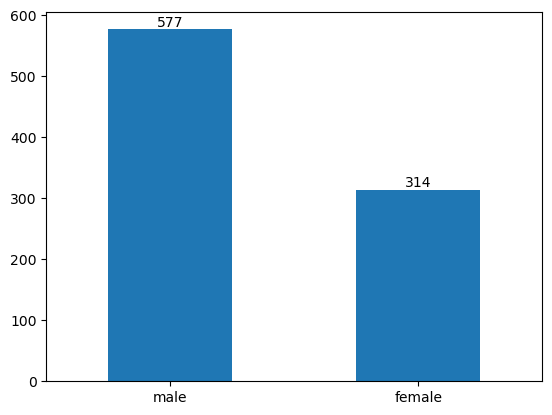

In [9]:
#Sex distribution
ax = train_copy['Sex'].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.xticks(rotation='horizontal')

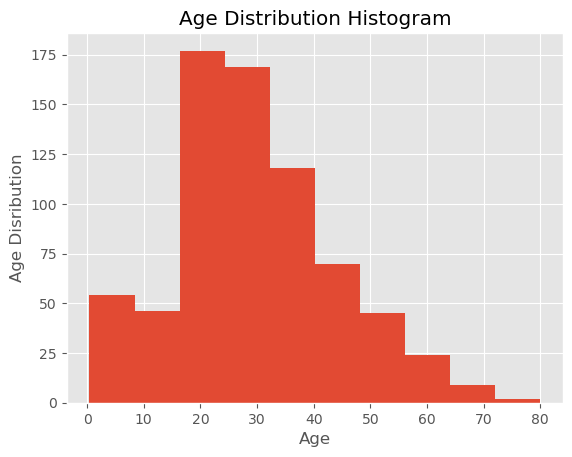

In [10]:
#Age distribution
plt.style.use('ggplot')
ages = train_copy['Age']
plt.hist(ages)
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram")
plt.show()

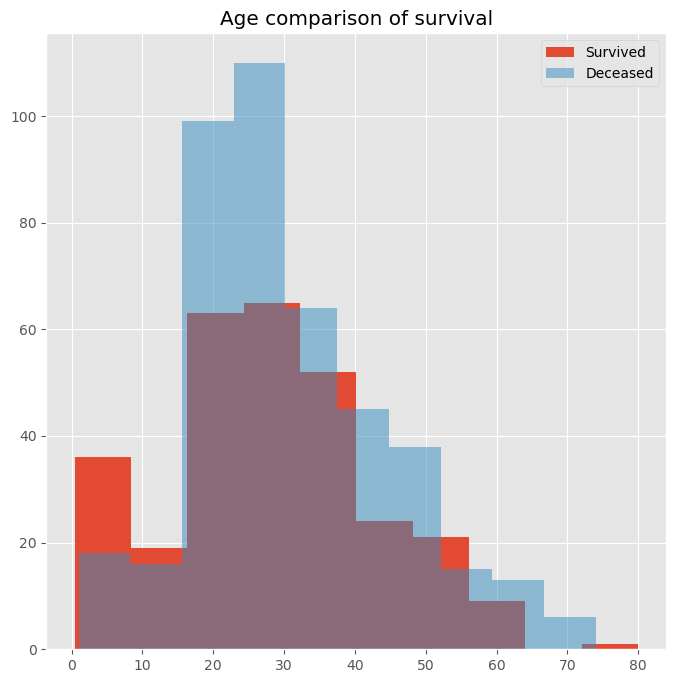

In [11]:
#compare survived/not survived based on age
plt.title('Age comparison of survival')
plt.hist(train_copy['Age'].loc[train_copy['Survived']==1],label='Survived')
plt.hist(train_copy['Age'].loc[train_copy['Survived']==0], alpha = 0.5, label='Deceased')
plt.legend()
plt.show()

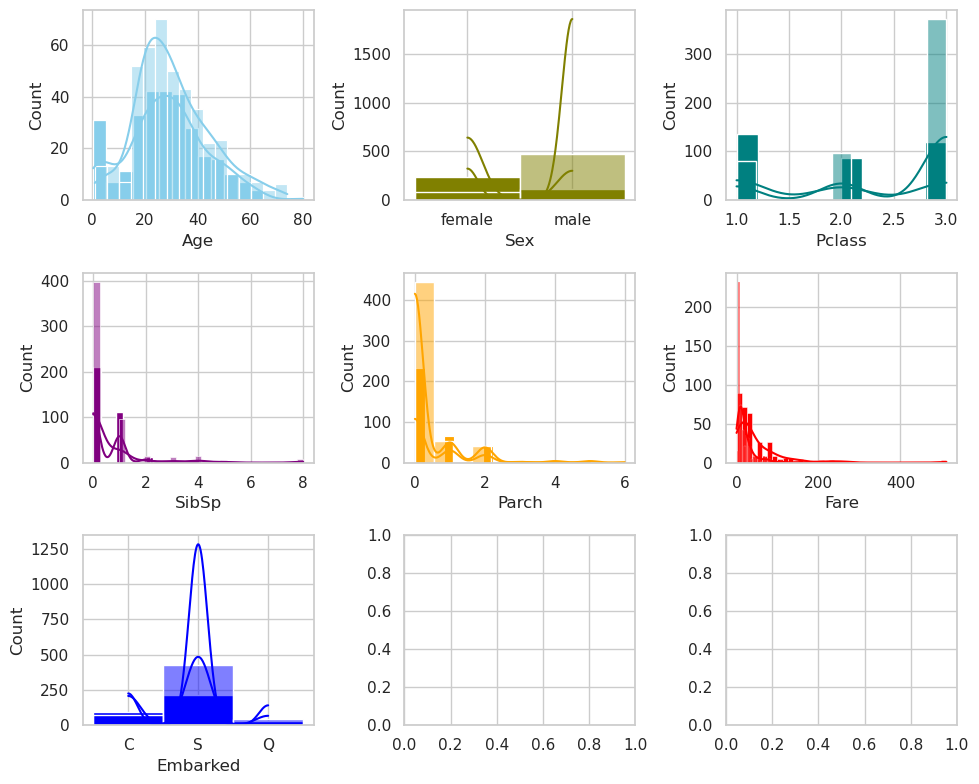

In [12]:
#Histogram grid to identify areas to explore further

sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,3, figsize = (10,8))
sns.histplot(data=train_copy['Age'].loc[train_copy['Survived']==1], kde=True, color='skyblue', alpha = 1, ax=axs[0, 0])
sns.histplot(data=train_copy['Age'].loc[train_copy['Survived']==0], kde=True, color='skyblue', alpha = 0.5, ax=axs[0, 0])
sns.histplot(data=train_copy['Sex'].loc[train_copy['Survived']==1], kde=True, color='olive', alpha = 1, ax=axs[0, 1])
sns.histplot(data=train_copy['Sex'].loc[train_copy['Survived']==0], kde=True, color='olive',alpha = 0.5, ax=axs[0, 1])
sns.histplot(data=train_copy['Pclass'].loc[train_copy['Survived']==1], kde=True, color='teal', alpha = 1, ax=axs[0, 2])
sns.histplot(data=train_copy['Pclass'].loc[train_copy['Survived']==0], kde=True, color='teal', alpha = 0.5, ax=axs[0, 2])
sns.histplot(data=train_copy['SibSp'].loc[train_copy['Survived']==1], kde=True, color='purple', alpha = 1, ax=axs[1, 0])
sns.histplot(data=train_copy['SibSp'].loc[train_copy['Survived']==0], kde=True, color='purple', alpha = 0.5, ax=axs[1, 0])
sns.histplot(data=train_copy['Parch'].loc[train_copy['Survived']==1], kde=True, color='orange', alpha = 1, ax=axs[1, 1])
sns.histplot(data=train_copy['Parch'].loc[train_copy['Survived']==0], kde=True, color='orange', alpha = 0.5, ax=axs[1, 1])
sns.histplot(data=train_copy['Fare'].loc[train_copy['Survived']==1], kde=True, color='red', alpha = 1, ax=axs[1, 2])
sns.histplot(data=train_copy['Fare'].loc[train_copy['Survived']==0], kde=True, color='red', alpha = 0.5, ax=axs[1, 2])
sns.histplot(data=train_copy['Embarked'].loc[train_copy['Survived']==1], kde=True, color='blue', alpha = 1, ax=axs[2, 0])
sns.histplot(data=train_copy['Embarked'].loc[train_copy['Survived']==0], kde=True, color='blue', alpha = 0.5, ax=axs[2, 0])

fig.tight_layout()
plt.show()

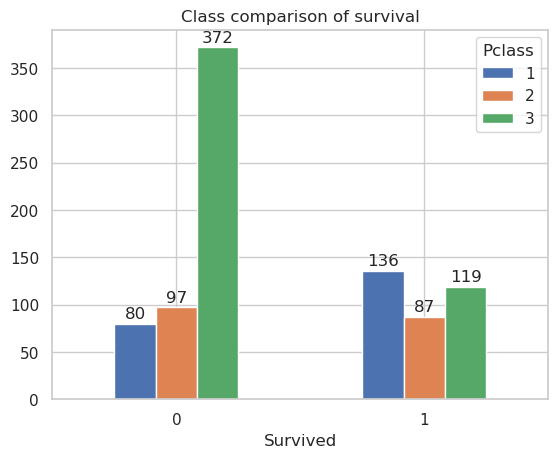

In [13]:
#Create a bar plot with separate bars for survived/not survived passengers and 1st/2nd/3rd class passengers
splot = train_copy.groupby(['Survived', 'Pclass'])['Survived'].count().unstack('Pclass').plot.bar()
plt.title('Class comparison of survival')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.xticks(rotation='horizontal')

plt.show()

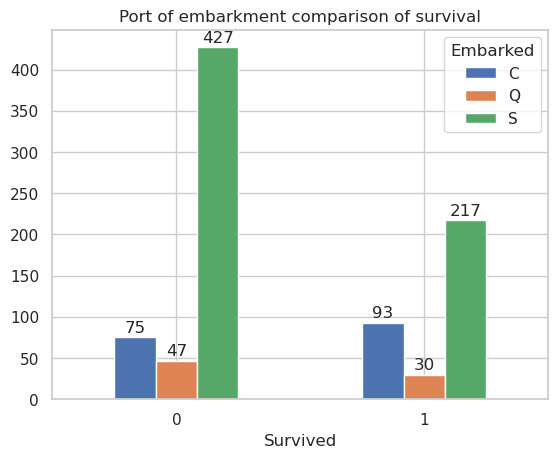

In [14]:
#Create a bar plot with separate bars for survived/not survived passengers and embarkment port
splot = train_copy.groupby(['Survived', 'Embarked'])['Survived'].count().unstack('Embarked').plot.bar()
plt.title('Port of embarkment comparison of survival')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.xticks(rotation='horizontal')

plt.show()

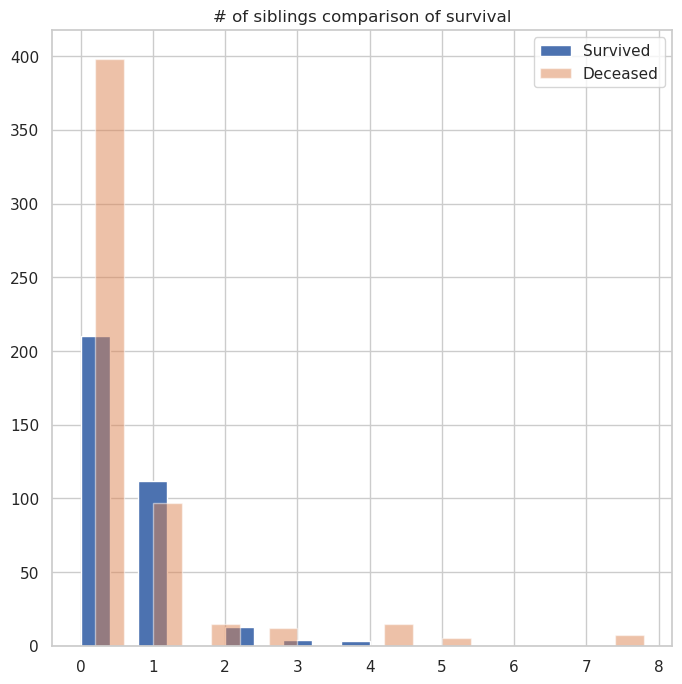

In [15]:
#Create a bar plot with separate bars for survived/not survived passengers and number of siblings
plt.figure(figsize=(8,8))
plt.title('# of siblings comparison of survival')
plt.hist(train_copy['SibSp'].loc[train_copy['Survived']==1],label='Survived')
plt.hist(train_copy['SibSp'].loc[train_copy['Survived']==0], alpha = 0.5, label='Deceased', rwidth=0.5)
plt.legend()
plt.show()

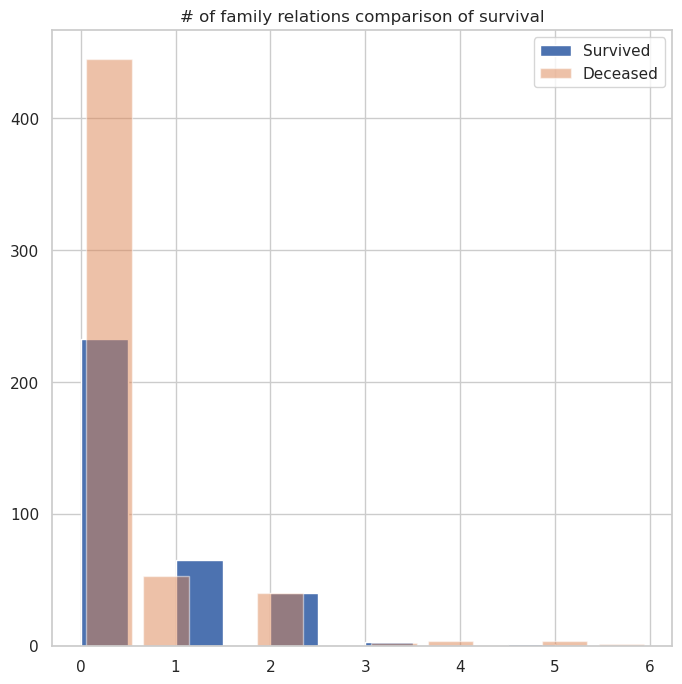

In [16]:
#Create a bar plot with separate bars for survived/not survived and family relations
plt.figure(figsize=(8,8))
plt.title('# of family relations comparison of survival')
plt.hist(train_copy['Parch'].loc[train_copy['Survived']==1],label='Survived')
plt.hist(train_copy['Parch'].loc[train_copy['Survived']==0], alpha = 0.5, label='Deceased', rwidth=0.8)
plt.legend()
plt.show()

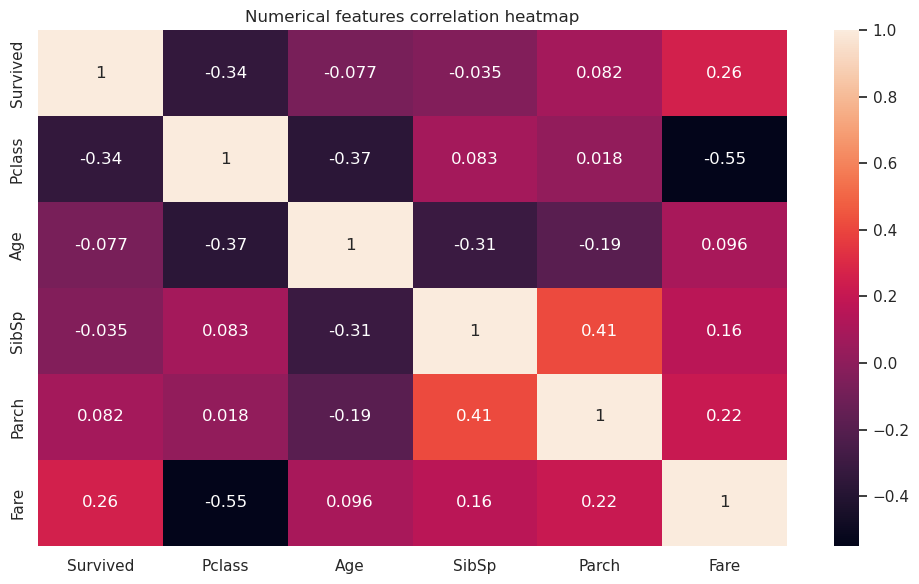

In [17]:
plt.figure(figsize=(10,6))
plt.title('Numerical features correlation heatmap')
sns.heatmap(train_copy.corr(), annot=True)
plt.tight_layout()

In [18]:
#The heatmap shows correlation between SibSp and Parch, therefore we will combine those two features
train_copy['family'] = train_copy['SibSp'] + train_copy['Parch']

In [19]:
train_copy.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [20]:
#Exploring the relationship between the # of words in the Ticket column and survival
train_copy['ticket_len'] = train_copy['Ticket'].str.count(' ')

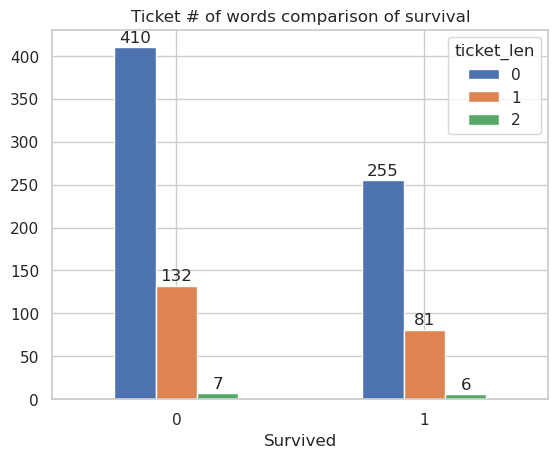

In [21]:
#Create a bar plot with separate bars for survived/not survived and # of words in the Ticket column
splot = train_copy.groupby(['Survived', 'ticket_len'])['Survived'].count().unstack('ticket_len').plot.bar()
plt.title('Ticket # of words comparison of survival')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.xticks(rotation='horizontal')

plt.show()

In [22]:
#We do the same with the Name columns
train_copy['name_len'] = train_copy['Name'].str.count(' ')

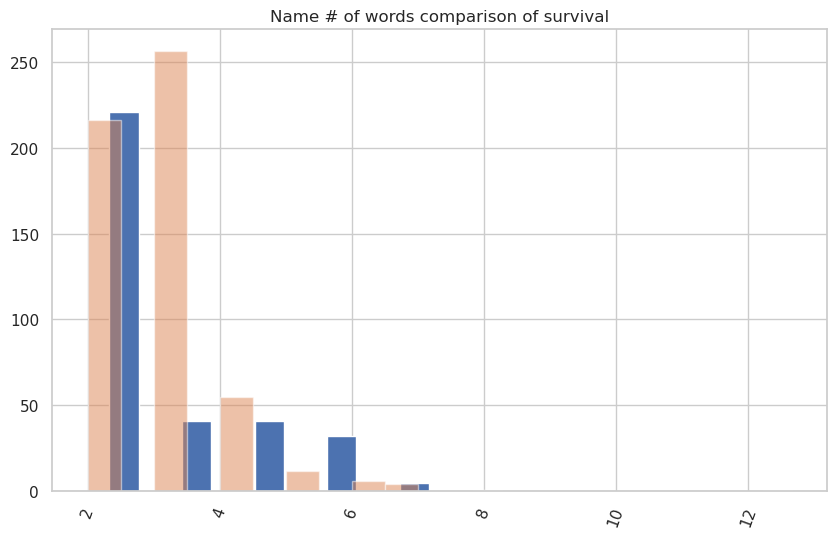

In [23]:
#Create a bar plot with separate bars for survived/not survived and # of words in the Name column
plt.figure(figsize=(10,6))
plt.title('Name # of words comparison of survival')
plt.hist(train_copy['name_len'].loc[train_copy['Survived']==1], rwidth=0.4)
plt.hist(train_copy['name_len'].loc[train_copy['Survived']==0], alpha = 0.5)
plt.xticks(rotation=70)
plt.show()

In [24]:
#Exploring the connection between the name title and survival
train_copy['title'] = train_copy['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [25]:
train_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,ticket_len,name_len,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,3,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,6,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,2,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,6,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,3,Mr


In [26]:
train_copy.groupby(['title', 'Survived'])['Survived'].count().unstack('title')

title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [27]:
bins = len(train_copy['title'].unique())

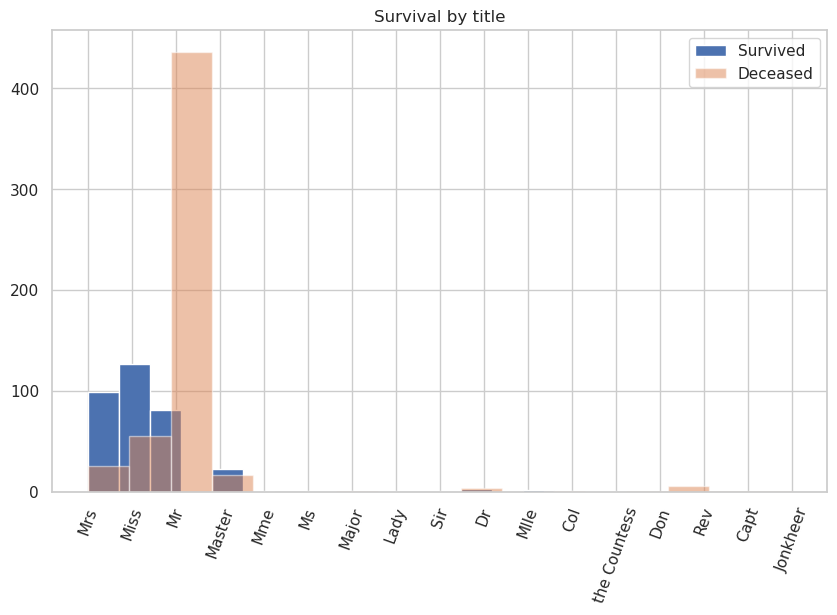

In [28]:
#compare survived/not survived based on age
plt.figure(figsize=(10,6))
plt.title('Survival by title')
plt.hist(train_copy['title'].loc[train_copy['Survived']==1], bins=bins, label='Survived')
plt.hist(train_copy['title'].loc[train_copy['Survived']==0], bins=bins, alpha = 0.5, label='Deceased')
plt.xticks(rotation=70)
plt.legend()
plt.show()

## Feature Engineering

In [29]:
#Fill the Embarked missing values with the mode of the column
train_copy['Embarked'].fillna(train_copy['Embarked'].mode()[0], inplace=True)

In [30]:
#Use the KNNImputer to impute missing age and embarked port values
from numpy import isnan
X = train_copy[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
# define imputer
imputer = KNNImputer(n_neighbors=3, weights="distance")# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

train_copy['Age_trans'] = Xtrans[:,2]
train_copy[train_copy['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,ticket_len,name_len,title,Age_trans
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,2,Mr,22.689195
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,0,3,Mr,32.833333
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,0,2,Mrs,18.500000
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,0,3,Mr,38.500000
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,0,3,Miss,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0,0,2,Mr,24.666667
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10,1,4,Miss,38.380196
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0,0,3,Mr,24.000000
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0,0,2,Mr,31.333333


In [31]:
train_copy.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        0
family          0
ticket_len      0
name_len        0
title           0
Age_trans       0
dtype: int64

In [32]:
numeric_features = ['Age_trans', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass', 'family', 'name_len', 'ticket_len', 'title']

In [33]:
#Using Pipeline and ColumnTransformer, to scale the numberical features and onehot encode the categorical
numeric_transformer = Pipeline(
    steps=[ 
           ("scaler", MinMaxScaler())]
           )
           
categorical_transformer = Pipeline(
                        [("cat_ohe", OneHotEncoder(handle_unknown='ignore', drop='first'))]
                        )        

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [34]:
X = train_copy[['Age_trans', 'Fare', 'Sex', 'Embarked', 'Pclass', 'family', 'name_len', 'ticket_len', 'title']]
y = train_copy['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
#importing test data
test = pd.read_csv('test.csv')

In [37]:
#create the columns we also have on train
test['family'] = test['Parch'] + test['SibSp']

In [38]:
test['title'] = test['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [39]:
test['name_len'] = test['Name'].str.count(' ')

In [40]:
test['ticket_len'] = test['Ticket'].str.count(' ')

In [41]:
#checking for missing values
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
family           0
title            0
name_len         0
ticket_len       0
dtype: int64

In [42]:
X = test[['Pclass', 'Age', 'family', 'Fare']]
# define imputer
imputer = KNNImputer(n_neighbors=3, weights="distance")# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
#imputing Age and Fare missing values
test['Age_trans'] = Xtrans[:,1]
test['Fare'] = Xtrans[:, 3]
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,title,name_len,ticket_len,Age_trans
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,2,0,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,4,0,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,3,0,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,2,0,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,Mrs,5,0,22.0


In [43]:
test.drop(columns=['Name', 'Ticket', 'Cabin', 'Age'], axis=1, inplace=True)

In [44]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
family         0
title          0
name_len       0
ticket_len     0
Age_trans      0
dtype: int64

## Model building and training

In [45]:
#machine learning imports
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [46]:
#Using the VotingClassifier to get a good mix of LogReg, DecisionTrees and RandomForest
models = [
          ('logreg', LogisticRegression()),
          ('forest', RandomForestClassifier(n_estimators=120, random_state=42)),
          ('svm', SVC(kernel='rbf', C=0.1)),
          ('dectree', DecisionTreeClassifier(max_depth=4, random_state=42))
]

clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ('logreg', VotingClassifier(models))]
)

In [47]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.844


In [48]:
ypred = clf.predict(X_test)

## Model Evaluation

In [49]:
# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [50]:
#Checking the precision and recall scores on the test data
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)

print(f'Precision = {precision:.4f} \nRecall = {recall:.4f}')

Precision = 0.8596 
Recall = 0.7101


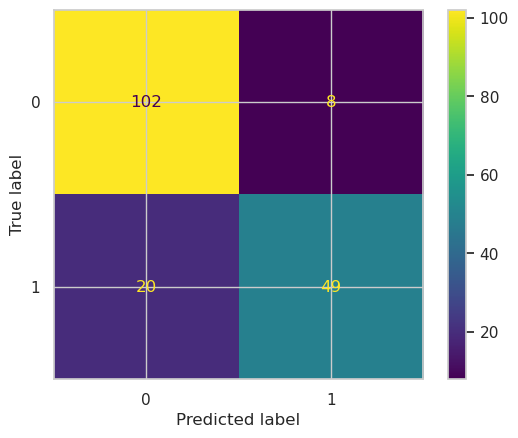

In [51]:
#Checking the true and false, positives and negatives
ConfusionMatrixDisplay.from_predictions(y_test, ypred, normalize=None)

In [52]:
#Creating a new Dataframe
predicted_surv = test.copy()

In [53]:
predicted_surv.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'family', 'title', 'name_len', 'ticket_len', 'Age_trans'],
      dtype='object')

In [54]:
predicted_surv.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
family         0
title          0
name_len       0
ticket_len     0
Age_trans      0
dtype: int64

In [55]:
#Adding the predicted survivors column in the Dataframe
predicted_surv['Survived'] = clf.predict(predicted_surv)

In [56]:
predicted_surv.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'family', 'title', 'name_len', 'ticket_len', 'Age_trans', 'Survived'],
      dtype='object')

In [57]:
predicted_surv.drop(columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare',
       'family', 'title', 'name_len', 'ticket_len', 'Age_trans',], axis=1, inplace=True)

In [58]:
predicted_surv

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
#Generating the csv for uploading to Kaggle
predicted_surv.to_csv('predict_surv.csv', index=False)

**Kaggle Score: 0.79425**